<a href="https://colab.research.google.com/github/DangTran-hub/digit-recognition/blob/main/number_detec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
DATASET_DIR = "/content/drive/MyDrive/dataset_number_video/dataset_split"
IMG_SIZE = 64
BATCH_SIZE = 32
EPOCHS = 20


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,            # đúng yêu cầu đề
    brightness_range=[0.8, 1.2],
    zoom_range=0.1
)

val_test_datagen = ImageDataGenerator(
    rescale=1./255
)


In [25]:
train_gen = train_datagen.flow_from_directory(
    DATASET_DIR + "/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE
)

val_gen = val_test_datagen.flow_from_directory(
    DATASET_DIR + "/val",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE
)

test_gen = val_test_datagen.flow_from_directory(
    DATASET_DIR + "/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 700 images belonging to 10 classes.
Found 150 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])


In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [28]:
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 701ms/step - accuracy: 0.0924 - loss: 2.3824 - val_accuracy: 0.1000 - val_loss: 2.3024
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 704ms/step - accuracy: 0.0985 - loss: 2.3023 - val_accuracy: 0.1000 - val_loss: 2.3010
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 682ms/step - accuracy: 0.1002 - loss: 2.2994 - val_accuracy: 0.2000 - val_loss: 2.2845
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 685ms/step - accuracy: 0.1634 - loss: 2.2676 - val_accuracy: 0.0867 - val_loss: 2.2405
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 688ms/step - accuracy: 0.1529 - loss: 2.2235 - val_accuracy: 0.1200 - val_loss: 2.1754
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 693ms/step - accuracy: 0.1786 - loss: 2.2509 - val_accuracy: 0.3200 - val_loss: 2.0931
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 711ms/step - accuracy: 0.2444 - loss: 2.0971 - val_accuracy: 0.3667 - val_loss: 1.9254
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 713ms/step - accuracy: 0.2736 - loss: 2.0223 - val_accu

In [29]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test accuracy:", test_acc)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.6128 - loss: 1.1346
Test accuracy: 0.6000000238418579


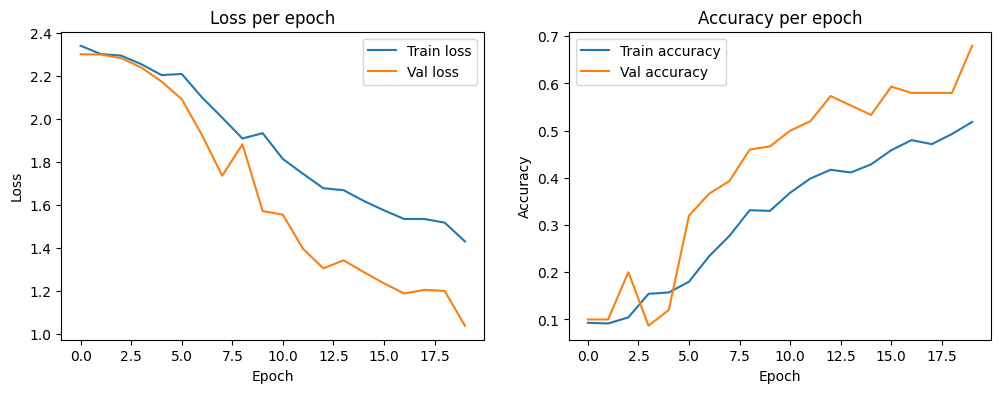

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per epoch')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per epoch')

plt.show()
